# Overview of filters

The [pyfar.dsp.filter](https://pyfar.readthedocs.io/en/stable/modules/pyfar.dsp.filter.html) module contains different filter types that are briefly introduced in the following. The filters can be used to directly filter pyfar *Signals* or can return a pyfar *Filter* object. For more information on this refer to the example notebooks on [filtering](https://pyfar-gallery.readthedocs.io/en/latest/gallery/interactive/pyfar_filtering.html) and [audio objects](https://pyfar-gallery.readthedocs.io/en/latest/gallery/interactive/pyfar_audio_objects.html). All examples use an impulse to illustrate the different filter types.

In [ ]:
import pyfar as pf
import matplotlib.pyplot as plt
%matplotlib inline

impulse = pf.signals.impulse(44100)

## Standard filters

These are the classic filters that are wrapped from *scipy.signal* and
available from the functions [pyfar.dsp.filter.butterworth](https://pyfar.readthedocs.io/en/stable/modules/pyfar.dsp.filter.html#pyfar.dsp.filter.butterworth), [pyfar.dsp.filter.bessel](https://pyfar.readthedocs.io/en/stable/modules/pyfar.dsp.filter.html#pyfar.dsp.filter.bessel), [pyfar.dsp.filter.chebyshev1](https://pyfar.readthedocs.io/en/stable/modules/pyfar.dsp.filter.html#pyfar.dsp.filter.chebyshev1), [pyfar.dsp.filter.chebyshev2](https://pyfar.readthedocs.io/en/stable/modules/pyfar.dsp.filter.html#pyfar.dsp.filter.chebyshev2), and [pyfar.dsp.filter.elliptic](https://pyfar.readthedocs.io/en/stable/modules/pyfar.dsp.filter.html#pyfar.dsp.filter.elliptic). They can be realized as high-pass, low-pass, band-pass, and band-stop filters as illustrated in the following examples.

### High-pass filters

In [ ]:
# filter order, cut-off frequency and type
N = 4
frequency = 1e3
btype = 'highpass'

# plot
y = pf.dsp.filter.butterworth(impulse, N, frequency, btype=btype)
ax = pf.plot.freq(y, label='Butterworth')

y = pf.dsp.filter.bessel(impulse, N, frequency, btype=btype)
pf.plot.freq(y * 10**(-5/20), label='Bessel')

y = pf.dsp.filter.chebyshev1(impulse, N, 1, frequency, btype=btype)
pf.plot.freq(y * 10**(-10/20), label='Chebyshev Type I')

y = pf.dsp.filter.chebyshev2(impulse, N, 60, 300, btype=btype)
pf.plot.freq(y * 10**(-15/20), label='Chebyshev Type II')

y = pf.dsp.filter.elliptic(impulse, N, 1, 60, frequency, btype=btype)
pf.plot.freq(y * 10**(-20/20), label='Elliptic')

ax.legend(loc='lower right')
plt.show()

### Low-pass filters

In [ ]:
btype = 'lowpass'

y = pf.dsp.filter.butterworth(impulse, N, frequency, btype=btype)
ax = pf.plot.freq(y, label='Butterworth')

y = pf.dsp.filter.bessel(impulse, N, frequency, btype=btype)
pf.plot.freq(y * 10**(-5/20), label='Bessel')

y = pf.dsp.filter.chebyshev1(impulse, N, 1, frequency, btype=btype)
pf.plot.freq(y * 10**(-10/20), label='Chebyshev Type I')

y = pf.dsp.filter.chebyshev2(impulse, N, 60, 3500, btype=btype)
pf.plot.freq(y * 10**(-15/20), label='Chebyshev Type II')

y = pf.dsp.filter.elliptic(impulse, N, 1, 60, frequency, btype=btype)
pf.plot.freq(y * 10**(-20/20), label='Elliptic')

ax.legend(loc='lower left')
plt.show()

### Band-pass filters

In [ ]:
frequency = [500, 2e3]
btype = 'bandpass'

y = pf.dsp.filter.butterworth(impulse, N, frequency, btype=btype)
ax = pf.plot.freq(y, label='Butterworth')

y = pf.dsp.filter.bessel(impulse, N, frequency, btype=btype)
pf.plot.freq(y * 10**(-5/20), label='Bessel')

y = pf.dsp.filter.chebyshev1(impulse, N, 1, frequency, btype=btype)
pf.plot.freq(y * 10**(-10/20), label='Chebyshev Type I')

y = pf.dsp.filter.chebyshev2(impulse, N, 60, [175, 5500], btype=btype)
pf.plot.freq(y * 10**(-15/20), label='Chebyshev Type II')

y = pf.dsp.filter.elliptic(impulse, N, 1, 60, frequency, btype=btype)
pf.plot.freq(y * 10**(-20/20), label='Elliptic')

ax.legend()
plt.show()

### Band-stop filters

In [ ]:
frequency = [250, 5e3]
btype = 'bandstop'

y = pf.dsp.filter.butterworth(impulse, N, frequency, btype=btype)
ax = pf.plot.freq(y, label='Butterworth')

y = pf.dsp.filter.bessel(impulse, N, frequency, btype=btype)
pf.plot.freq(y * 10**(-5/20), label='Bessel')

y = pf.dsp.filter.chebyshev1(impulse, N, 1, frequency, btype=btype)
pf.plot.freq(y * 10**(-10/20), label='Chebyshev Type I')

y = pf.dsp.filter.chebyshev2(impulse, N, 60, [175, 5500], btype=btype)
pf.plot.freq(y * 10**(-15/20), label='Chebyshev Type II')

y = pf.dsp.filter.elliptic(impulse, N, 1, 60, frequency, btype=btype)
pf.plot.freq(y * 10**(-20/20), label='Elliptic')

ax.legend(loc='lower left')
plt.show()

## Linkwitz-Riley cross-over

The function [pyfar.dsp.filter.crossover](https://pyfar.readthedocs.io/en/stable/modules/pyfar.dsp.filter.html#pyfar.dsp.filter.crossover) implements Linkwitz-Riley cross-over filters that are often used in loudspeaker design. The magnitude of the filters at the cross-over frequency is -6 dB and because the filters are in phase, their output adds to a constant magnitude response.

In [ ]:
frequency = 1e3

y = pf.dsp.filter.crossover(impulse, N, frequency)
ax = pf.plot.freq(y, label=['low-pass', 'high-pass'])
pf.plot.freq(y[0] + y[1], color=[0, 0, 0, .5], linestyle='--', label='sum')

ax.legend(loc='lower left')
plt.show()

## Filter banks

Filter banks are commonly used in audio and acoustics signal processing and pyfar contains the following filter banks.

### Fractional octaves

The fractional octave filter bank implemented in [pyfar.dsp.filter.fractional_octave_bands](https://pyfar.readthedocs.io/en/stable/modules/pyfar.dsp.filter.html#pyfar.dsp.filter.fractional_octave_bands) is often used for calculating room acoustic parameters. The magnitude responses at the cut-off frequencies are -3 dB and hence the filter bank is approximately energy preserving.

In [ ]:
y = pf.dsp.filter.fractional_octave_bands(impulse, 1, frequency_range=(60, 12e3))
ax = pf.plot.freq(y)
ax.set_ylim(-60, 5)
plt.show()

The center frequencies of the filters are accessible via [pyfar.dsp.filter.fractional_octave_frequencies](https://pyfar.readthedocs.io/en/stable/modules/pyfar.dsp.filter.html#pyfar.dsp.filter.fractional_octave_frequencies).


### Reconstructing fractional octaves

The reconstructing fractional octave filter bank implemented in [pyfar.dsp.filter.reconstructing_fractional_octave_bands](https://pyfar.readthedocs.io/en/stable/modules/pyfar.dsp.filter.html#pyfar.dsp.filter.reconstructing_fractional_octave_bands) has -6 dB cut off frequencies and a linear phase response. This makes sure that any input can be perfectly reconstructed by summing the input, at the cost of adding a frequency independent delay of half the filter length. This filter bank can for example be used for room acoustical simulations.

In [ ]:
y, *_ = pf.dsp.filter.reconstructing_fractional_octave_bands(impulse, 1)
ax = pf.plot.freq(y)
ax.set_ylim(-60, 5)
plt.show()

The center frequencies of the filters are accessible via [pyfar.dsp.filter.fractional_octave_frequencies](https://pyfar.readthedocs.io/en/stable/modules/pyfar.dsp.filter.html#pyfar.dsp.filter.fractional_octave_frequencies).


### Gammatone (auditory)

The auditory gammatone filter bank implemented in [pyfar.dsp.filter.GammatoneBands](https://pyfar.readthedocs.io/en/stable/modules/pyfar.dsp.filter.html#pyfar.dsp.filter.GammatoneBands) mimics the frequency selectivity of the human auditory system. It is almost perfectly reconstructing and is often used for binaural modeling. It is a direct port of the famous [Hohmann2002](https://www.amtoolbox.org/amt-1.2.0/doc/demos/demo_hohmann2002.php) filter bank from the auditory modeling toolbox.

In [ ]:
gtf = pf.dsp.filter.GammatoneBands((20, 20e3))
y, _ = gtf.process(impulse)
ax = pf.plot.freq(y)
ax.set_ylim(-60, 5)
plt.show()

The center frequencies of the filters are accessible via [pyfar.dsp.filter.erb_frequencies](https://pyfar.readthedocs.io/en/stable/modules/pyfar.dsp.filter.html#pyfar.dsp.filter.erb_frequencies).

## Parametric equalizer

Parametric equalizers are specific filters used for example for audio effects or loudspeaker and room equalization. The *bell* filters implemented in [pyfar.dsp.filter.bell](https://pyfar.readthedocs.io/en/stable/modules/pyfar.dsp.filter.html#pyfar.dsp.filter.bell) manipulate the magnitude response around a center-frequency. The *shelve* filters implemented in [pyfar.dsp.filter.high_shelve](https://pyfar.readthedocs.io/en/stable/modules/pyfar.dsp.filter.html#pyfar.dsp.filter.high_shelve) and [pyfar.dsp.filter.low_shelve](https://pyfar.readthedocs.io/en/stable/modules/pyfar.dsp.filter.html#pyfar.dsp.filter.low_shelve) manipulate the magnitude response below or above a given characteristic frequency and the *notch* filters implemented in [pyfar.dsp.filter.notch](https://pyfar.readthedocs.io/en/stable/modules/pyfar.dsp.filter.html#pyfar.dsp.filter.notch) are very narrow band rejection filters.

In [ ]:
y = pf.dsp.filter.bell(impulse, frequency, 10, 2)
ax = pf.plot.freq(y, label='Bell')

y = pf.dsp.filter.bell(impulse, frequency, -10, 2)
pf.plot.freq(y, color='b', linestyle='--')

y = pf.dsp.filter.high_shelf(impulse, 4*frequency, 10, 2, 'II')
pf.plot.freq(y * 10**(-20/20), label='High-shelve')

y = pf.dsp.filter.high_shelf(impulse, 4*frequency, -10, 2, 'II')
pf.plot.freq(y * 10**(-20/20), color='r', linestyle='--')

y = pf.dsp.filter.low_shelf(impulse, 1/4*frequency, 10, 2, 'II')
pf.plot.freq(y * 10**(-40/20), label='Low-shelve')

y = pf.dsp.filter.low_shelf(impulse, 1/4*frequency, -10, 2, 'II')
pf.plot.freq(y * 10**(-40/20), color='y', linestyle='--')

y = pf.dsp.filter.notch(impulse * .1**3, 1000, 4)
pf.plot.freq(y, label='Notch')

ax.set_ylim(-100, 20)
ax.legend(loc='lower left', ncol=2)
plt.show()



The *cascaded shelving* filters implemented in [pyfar.dsp.filter.low_shelve_cascade](https://pyfar.readthedocs.io/en/stable/modules/pyfar.dsp.filter.html#pyfar.dsp.filter.low_shelve_cascade) and
[pyfar.dsp.filter.high_shelve_cascade](https://pyfar.readthedocs.io/en/stable/modules/pyfar.dsp.filter.html#pyfar.dsp.filter.high_shelve_cascade) shown on the right can be used
to generate filters with a user definable slope given in dB per octaves within
a certain frequency region. They are also termed *High-Schultz* and *Low-Shultz* filters to acknowledge one of their inventors Frank Schultz.

In [ ]:
y, *_ = pf.dsp.filter.high_shelf_cascade(impulse, 125, 'lower', 10, None, 5)
ax = pf.plot.freq(y, label="High-shelve cascade")

y, *_ = pf.dsp.filter.high_shelf_cascade(impulse, 125, 'lower', -10, None, 5)
pf.plot.freq(y, label="High-shelve cascade")

y, *_ = pf.dsp.filter.low_shelf_cascade(impulse, 125, 'lower', 10, None, 5)
pf.plot.freq(y * 10**(-20/20), label="Low-shelve cascade")

y, *_ = pf.dsp.filter.low_shelf_cascade(impulse, 125, 'lower', -10, None, 5)
pf.plot.freq(y * 10**(-20/20), label="Low-shelve cascade")

ax.set_ylim(-40, 20)
ax.legend(loc='lower right', ncol=2)
plt.show()

# License notice
This notebook © 2024 by [the pyfar developers](https://github.com/orgs/pyfar/people) is licensed under [CC BY 4.0](http://creativecommons.org/licenses/by/4.0/?ref=chooser-v1)

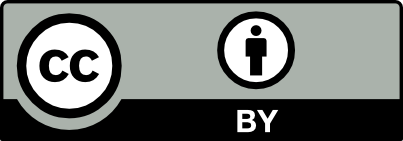


# Watermark

In [ ]:
%load_ext watermark
%watermark -v -m -iv